📌 Project Title: Clustering Instagram Users Based on Visit Patterns and Spending Behavior

🔍 Introduction:
In this project, we use a real-world dataset from Kaggle that captures Instagram user activity and spending habits:https://www.kaggle.com/datasets/chaandsheikh/instagram-visit-clustering. 
The goal is to build a complete Unsupervised Machine Learning pipeline — starting from data exploration and cleaning, and moving on to clustering users based on their behavior.

As social media continues to grow, understanding how users interact with platforms like Instagram is crucial for better marketing, content delivery, and engagement. This project focuses on grouping users by how often they visit Instagram and how much they spend.

🎯 Objective:
The aim is to apply and compare different clustering algorithms to discover unique user segments. These algorithms include:

K-Means Clustering

K-Medoids Clustering

Agglomerative Clustering (Single Linkage)

Agglomerative Clustering (Complete Linkage)

By using these methods, we aim to identify distinct user groups — such as frequent visitors, high spenders, or occasional users — without relying on any labeled data.


## 🔍 Clustering

Clustering is an unsupervised machine learning method used to group similar data points based on patterns or similarities in their features — without using labeled data.

🛠️ Types of Clustering Algorithms:

K-Means:
Groups data by assigning each point to the nearest cluster center (centroid), then updates centroids based on the average of points.

K-Medoids:
Similar to K-Means, but uses actual data points (called medoids) as the center of each cluster. More resistant to outliers.

Hierarchical Clustering:
    
Forms a hierarchy of clusters using linkage methods:

Single Linkage: Based on the closest pair of points between clusters.

Complete Linkage: Based on the farthest pair of points between clusters.

## 📊 K-Means Clustering
K-Means is one of the most widely used unsupervised machine learning algorithms for dividing a dataset into K distinct, non-overlapping clusters.

Its main goal is to group similar data points together by minimizing the distance between points and their cluster centroids.

⚙️ How K-Means Works (Step-by-Step):
1.Choose the number of clusters (K):
Decide how many clusters you want to divide the data into.

2.Initialize centroids:
Randomly select K data points as the initial cluster centers (centroids).

3.Assign data points to the nearest centroid:
Compute the distance between each point and all centroids (commonly using Euclidean distance).
Assign each point to the cluster with the closest centroid.

4.Update centroids:
For each cluster, calculate the new centroid by taking the mean of all points assigned to it.

5.Repeat the process:
Reassign points and update centroids.
Continue until centroids stop changing significantly (convergence) or a maximum number of iterations is reached.



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
data = pd.read_csv(r"C:\Users\vasav\OneDrive\Documents\Instagram visits clustering.csv")
data.head()

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [21]:
data = data.drop('User ID', axis=1)

In [23]:
data.head()

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397


In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

## Why elbow method?
K-means requires you to manually choose K, but if you pick too few or too many clusters, the results might not be meaningful. The Elbow Method helps you find a "sweet spot" where increasing K further doesn’t improve the clustering significantly.

### 📉 How It Works:

Run K-means for different values of K (e.g., K = 1 to 10).

Calculate the Within-Cluster Sum of Squares (WCSS) for each K.
                                                                              
WCSS measures how close data points are to their assigned cluster centroids (lower is better).
                                                                              
Plot K vs. WCSS.
                                                                              
Look for an "elbow" point on the graph:
It’s where the rate of decrease sharply slows down. That point is the optimal K — adding more clusters beyond that yields diminishing returns.



C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Win

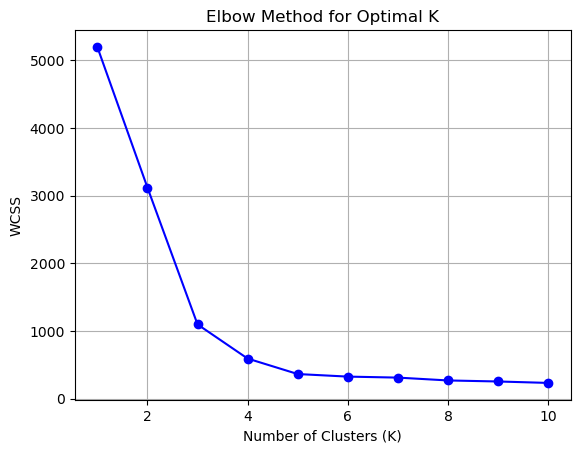

In [28]:
# Use Elbow Method to find optimal K
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

🔍 Key Observations and Inference:

1. X-axis: Number of clusters (K)

2. Y-axis: WCSS (Within-Cluster Sum of Squares)

3. Pattern:
WCSS drops sharply from K = 1 to K = 3, indicating significant improvement in clustering.
After K = 3, the decrease in WCSS slows down, forming an “elbow” around K = 3 or k = 4.

4. Inference:
The "elbow point" is at K = 3 or 4.
This suggests that 3 or 4 clusters provide a good balance between model performance and complexity.
Adding more clusters beyond this point results in minimal gains and risks overfitting.

✅ Conclusion:

K = 3 is likely the optimal number of clusters for your dataset, with K = 4 being a close alternative depending on the specific application or validation metrics.

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


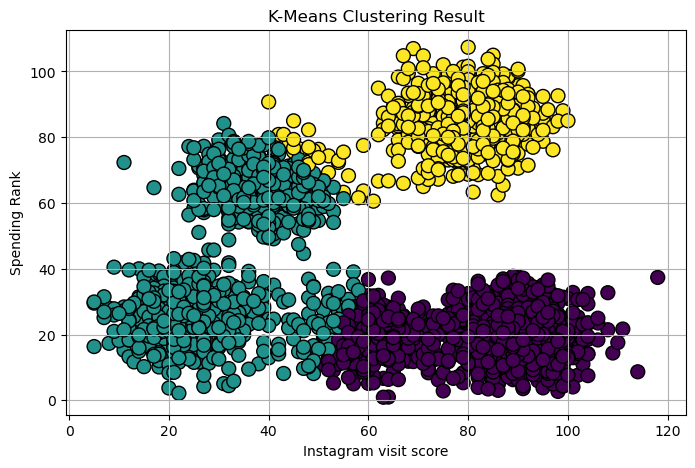

   Instagram visit score  Spending_rank(0 to 100)  Cluster
0                     63                24.050708        0
1                     61                25.223290        0
2                    104                18.528245        0
3                     82                86.890232        2
4                     14                31.492397        1


In [33]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Instagram visit score'], data['Spending_rank(0 to 100)'],
            c=data['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title("K-Means Clustering Result")
plt.xlabel("Instagram visit score")
plt.ylabel("Spending Rank")
plt.grid()
plt.show()

print(data.head())


This plot shows the K-Means clustering result for users based on their Instagram visit score and spending rank:

🟢Cluster 0 (Teal): Users with low to moderate Instagram usage and low to medium spending. Likely casual users.

🟡Cluster 1 (Yellow): Users with high Instagram usage and high spending. Likely active users influenced by the platform.

🟣 Cluster 2 (Dark Purple): Users with high Instagram usage but low spending. Likely content consumers who don’t spend much.

This clustering helps identify different user behavior patterns for better targeting.

## K-Medoids Clustering

K-medoids is a partitioning clustering algorithm similar to K-means, but with one important difference: instead of representing each cluster by the mean (centroid) of its points, K-medoids uses an actual data point—called the medoid—that is the most centrally located within the cluster.

📌 How K-Medoids Works:

Decide on the number of clusters (K).

Initialize by randomly selecting K actual data points as the initial medoids.

Assign each data point to the nearest medoid.

For each cluster, update the medoid by choosing the point that minimizes the total distance to all other points in that cluster.

Repeat steps 3 and 4 until the medoids stop changing or a stopping criterion is reached.

In [37]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [39]:
# ---------- Step 1: Load data using pandas ----------
def load_data(file_path):
    df = pd.read_csv(file_path)
    data = df.iloc[:, 1:3].values.tolist()  # Use columns 1 and 2 (ignore ID)
    return df, data

# ---------- Step 2: Define helper functions ----------
def euclidean_distance(p1, p2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

def total_cost(cluster, medoid):
    return sum(euclidean_distance(point, medoid) for point in cluster)

# ---------- Step 3: K-Medoids algorithm ----------
def k_medoids(data, k, max_iter=100):
    medoids = random.sample(data, k)

    for _ in range(max_iter):
        clusters = [[] for _ in range(k)]
        labels = []
        for point in data:
            distances = [euclidean_distance(point, medoid) for medoid in medoids]
            nearest_idx = distances.index(min(distances))
            clusters[nearest_idx].append(point)
            labels.append(nearest_idx)

        new_medoids = []
        for cluster in clusters:
            if not cluster:
                new_medoids.append(random.choice(data))
                continue
            min_cost = float('inf')
            best_medoid = cluster[0]
            for candidate in cluster:
                cost = total_cost(cluster, candidate)
                if cost < min_cost:
                    min_cost = cost
                    best_medoid = candidate
            new_medoids.append(best_medoid)

        if new_medoids == medoids:
            break
        medoids = new_medoids

    return medoids, clusters, labels

# ---------- Step 4: Run ----------
file_path = r"C:\Users\vasav\OneDrive\Documents\Instagram visits clustering.csv"
df, data_points = load_data(file_path)

k = 3
medoids, clusters, labels = k_medoids(data_points, k)

# Add cluster labels to original DataFrame
df['Cluster'] = labels

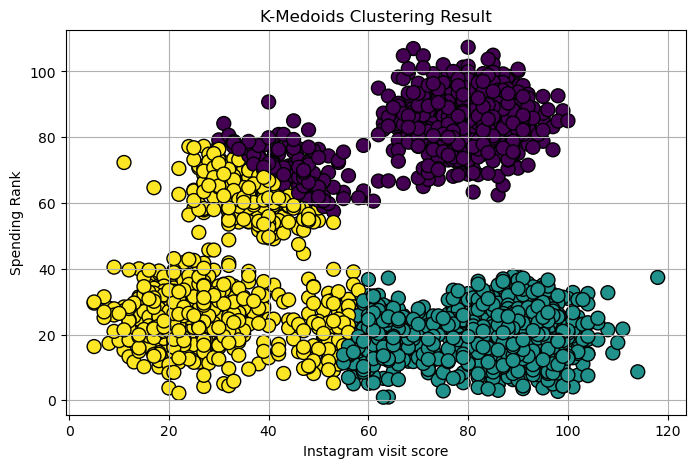

   User ID  Instagram visit score  Spending_rank(0 to 100)  Cluster
0        0                     63                24.050708        1
1        1                     61                25.223290        1
2        2                    104                18.528245        1
3        3                     82                86.890232        0
4        4                     14                31.492397        2


In [40]:
# ---------- Step 5: Plot ----------
plt.figure(figsize=(8, 5))
plt.scatter(df['Instagram visit score'], df['Spending_rank(0 to 100)'],
            c=df['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title("K-Medoids Clustering Result")
plt.xlabel("Instagram visit score")
plt.ylabel("Spending Rank")
plt.grid()
plt.show()

# Preview labeled data
print(df.head())

The plot shows the result of a K-Medoids clustering analysis based on two features: Instagram visit score and Spending Rank.

🧠 Inference from the Clustering Plot:

Three distinct clusters are observed:

Yellow cluster (top area): High spending rank, moderate to high Instagram visit scores.

Teal cluster (right area): High Instagram visit scores, low to mid spending rank.

Purple cluster (left area): Low Instagram visit scores, low to mid spending rank.




## Agglomerative Clustering
Agglomerative Clustering is a bottom-up hierarchical clustering method. It starts with each data point as an individual cluster and gradually merges the closest pairs of clusters step by step.

🔁 How It Works:
1.Start: Treat each data point as its own cluster (N clusters for N data points).

2.Compute Distances: Measure the distance between all clusters using a linkage method (e.g., single, complete, average, ward).

3.Merge Clusters: Find and merge the two closest clusters.

4.Repeat: Continue steps 2–3 until:

A specific number of clusters is reached, or

All points are merged into one single cluster (complete hierarchy).



In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv(r"C:\Users\vasav\OneDrive\Documents\Instagram visits clustering.csv")
data.head()

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [49]:
data = data.drop("User ID", axis=1)
data.head()

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397


In [51]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [53]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # You can change linkage
data['Cluster'] = model.fit_predict(scaled_data)

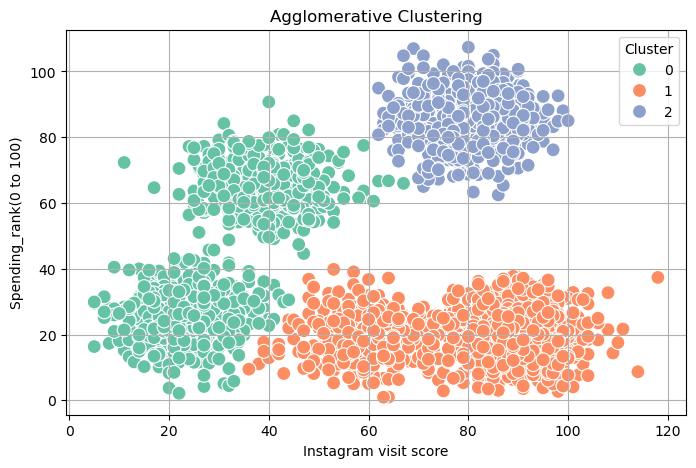

In [55]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=data['Instagram visit score'],
    y=data['Spending_rank(0 to 100)'],
    hue=data['Cluster'],
    palette='Set2',
    s=100
)
plt.title("Agglomerative Clustering")
plt.grid(True)
plt.show()


The scatter plot visualizes the results of Agglomerative Clustering based on two features: Instagram visit score (x-axis) and Spending_rank (0 to 100) (y-axis). Here are the key observations:

📊 Cluster Analysis:

1. Cluster 0 (Green):

Spread across both low and high Spending_rank.

Instagram visit scores are mostly below 60.

Likely represents low to moderate Instagram users with varied spending behaviors.


2. Cluster 1 (Orange):

Concentrated in the lower spending range (0 to 40).

Instagram visit scores are generally above 50.

Indicates frequent Instagram users with low spending ranks.


3. Cluster 2 (Blue):

High Spending_rank (mostly above 60).

Instagram visit scores mostly above 60.

Represents high spenders who are also frequent Instagram visitors.



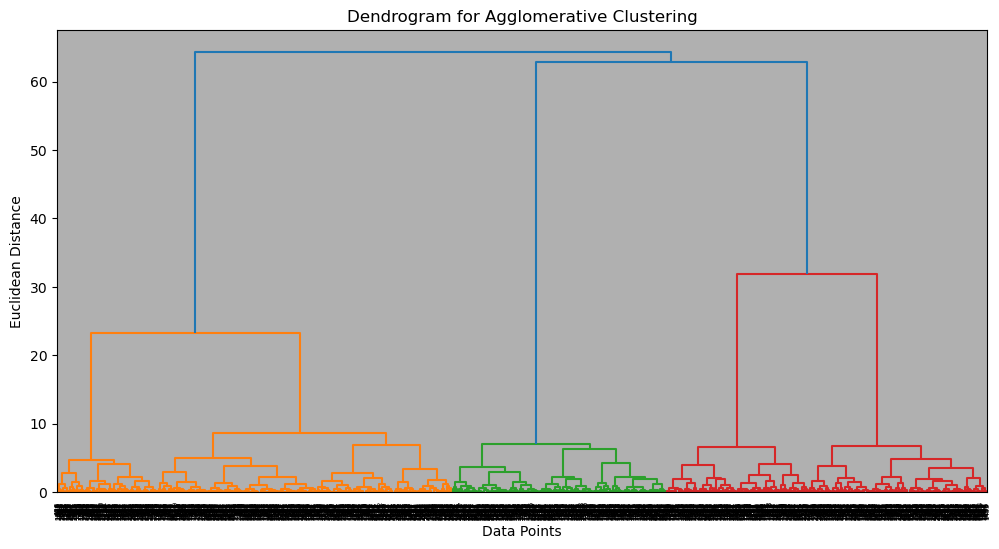

In [58]:
linked = linkage(scaled_data, method='ward')  # 'ward' is commonly used
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

A dendrogram is a tree-like diagram that shows how data points are grouped step by step.

X-axis: Represents individual data points.

Y-axis: Shows Euclidean distance (how dissimilar clusters are).

Merges are shown as horizontal lines — the height indicates how different the merged clusters are.

To find the optimal number of clusters, look for the largest vertical gap (called the "elbow").

This dendrogram suggests 3 clusters based on the structure.

## Agglomerative Hierarchical Clustering (Single Linkage)
Agglomerative hierarchical clustering with single linkage is a bottom-up clustering method. It starts with each data point as its own cluster and progressively merges clusters based on the shortest distance between any two points in different clusters.

📌 Step-by-Step Process:

1.Initialization

Treat each data point as a separate cluster.

For n data points, there are initially n clusters.

2.Compute Distance Matrix

Calculate all pairwise distances between data points using a chosen metric (e.g., Euclidean, Manhattan).

3.Apply Single Linkage

To find the distance between two clusters, identify the minimum distance between any point in one cluster and any point in the other:

D(A,B)=min{dist(a,b) ∣ a∈A, b∈B}

This approach connects clusters based on their nearest neighbors.

4.Merge Closest Clusters

Combine the two clusters with the smallest single linkage distance.

5.Update Distance Matrix

Recalculate distances between the newly formed cluster and all remaining clusters, using the single linkage criterion.

6.Repeat

Continue steps 3–5 until:

All data points are merged into one cluster (full dendrogram), or

A specified number of clusters is achieved.

This method is particularly effective for identifying elongated or chained clusters due to its focus on the closest points.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [64]:
data=pd.read_csv(r"C:\Users\vasav\OneDrive\Documents\Instagram visits clustering.csv")
data=data.drop('User ID',axis=1)
linked_single=linkage(data,method='single')

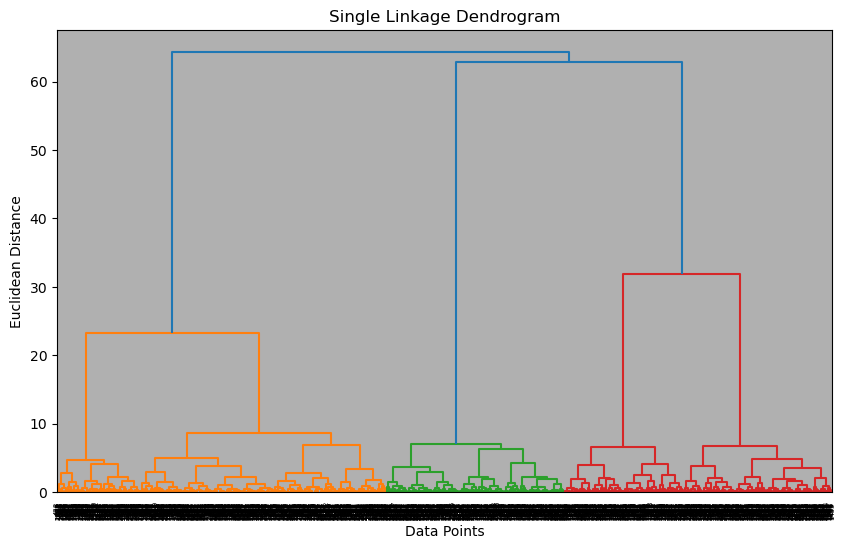

In [66]:
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Single Linkage Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

This plot represents a Single Linkage Dendrogram, a visual tool used in hierarchical clustering.

The x-axis displays individual data points.

The y-axis indicates the Euclidean distance at which clusters are merged.

The clustering method used is Single Linkage, where the distance between two clusters is defined as the shortest distance between any pair of points—one from each cluster.

Clusters are combined based on this minimum distance. The dendrogram visually illustrates the merging process and helps in identifying the optimal number of clusters by locating the largest vertical gaps, which represent significant jumps in cluster distance.

Such dendrograms are particularly useful for detecting elongated or chained clusters, as Single Linkage tends to link nearby points even across extended shapes.

In [68]:
clusters_single = fcluster(linked_single, t=2, criterion='maxclust')
print("Sinlge Linkage Clusters:", clusters_single)

Sinlge Linkage Clusters: [1 1 1 ... 1 1 1]


In [70]:
clusters_single

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

## Agglomerative Hierarchical Clustering with Complete Linkage

📊 What is Complete Linkage?

In complete linkage, the distance between two clusters is defined as the maximum distance between any pair of points — one from each cluster.
This approach encourages the formation of compact, evenly-sized, and well-separated clusters.

🧠 Step-by-Step Algorithm:

1.Initialization

Start by treating each data point as its own cluster (total of n clusters).

2.Compute Initial Distance Matrix

Calculate pairwise distances between all data points using a chosen metric (e.g., Euclidean).

3.Iterative Merging

Repeat the following steps until the desired number of clusters (K) is reached:

a. Find Closest Clusters

Use complete linkage to find the pair of clusters with the smallest maximum distance between their points.

b. Merge Clusters

Combine these two closest clusters into a new cluster.

c. Update Distance Matrix

For the newly formed cluster 
𝐶
new
  (from clusters A and B), compute its distance to any other cluster X as:

D(C 
new
​
 ,X)=max(D(A,X),D(B,X))

4.Stop Condition

The process continues until only K clusters remain.

Complete linkage is particularly useful when you want to avoid chaining effects and prefer tight and clearly separated groups.

In [73]:
data = pd.read_csv(r"C:\Users\vasav\OneDrive\Documents\Instagram visits clustering.csv")
data = data.drop("User ID", axis=1)

In [75]:
# Perform Complete Linkage Clustering
linked_complete = linkage(data, method='complete')

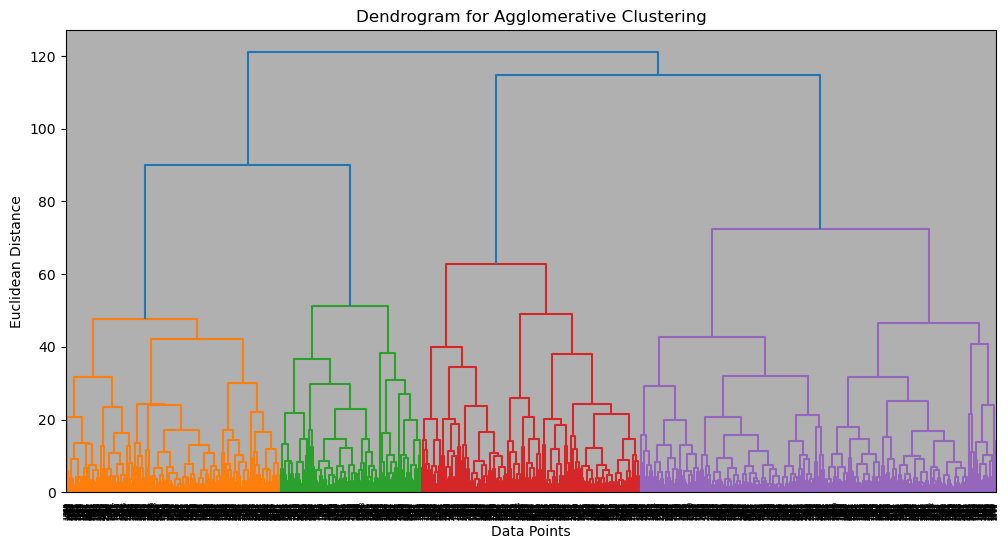

In [77]:
linked = linked_complete
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

This plot illustrates a Complete Linkage Dendrogram, a key visualization in hierarchical clustering.

The x-axis shows the individual data points.

The y-axis represents the Euclidean distance at which clusters are merged.

In complete linkage, the distance between two clusters is defined as the maximum distance between any pair of points from the clusters.

This method tends to produce compact, spherical, and well-separated clusters, avoiding the chaining effect common in single linkage.

The dendrogram visually tracks the clustering process and helps determine the optimal number of clusters by highlighting significant vertical gaps between merges.

This approach is ideal when the goal is to form tight and clearly distinct clusters.

In [80]:
clusters_complete = fcluster(linked_complete, t=2, criterion='maxclust')
print("Complete Linkage Clusters:", clusters_complete)

Complete Linkage Clusters: [2 2 2 ... 1 2 1]
